**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import( accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay)

from mlxtend.plotting import plot_decision_regions    # for decision boundaries

**Upload and load dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Iris.csv')

# Drop 'Id' column if present
df.drop('Id', axis=1, inplace=True, errors='ignore')

Saving Iris.csv to Iris.csv


**EDA - display info and basic stats**

In [3]:
print("\n Dataset overview:")
print(df.head())

print("\n Dataset info:")
print(df.info())

print("\nClass distribution:")
print(df['Species'].value_counts())


 Dataset overview:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Class distribution:
Species
Iris-setosa        50
Iris-v

**EDA - Visualization**

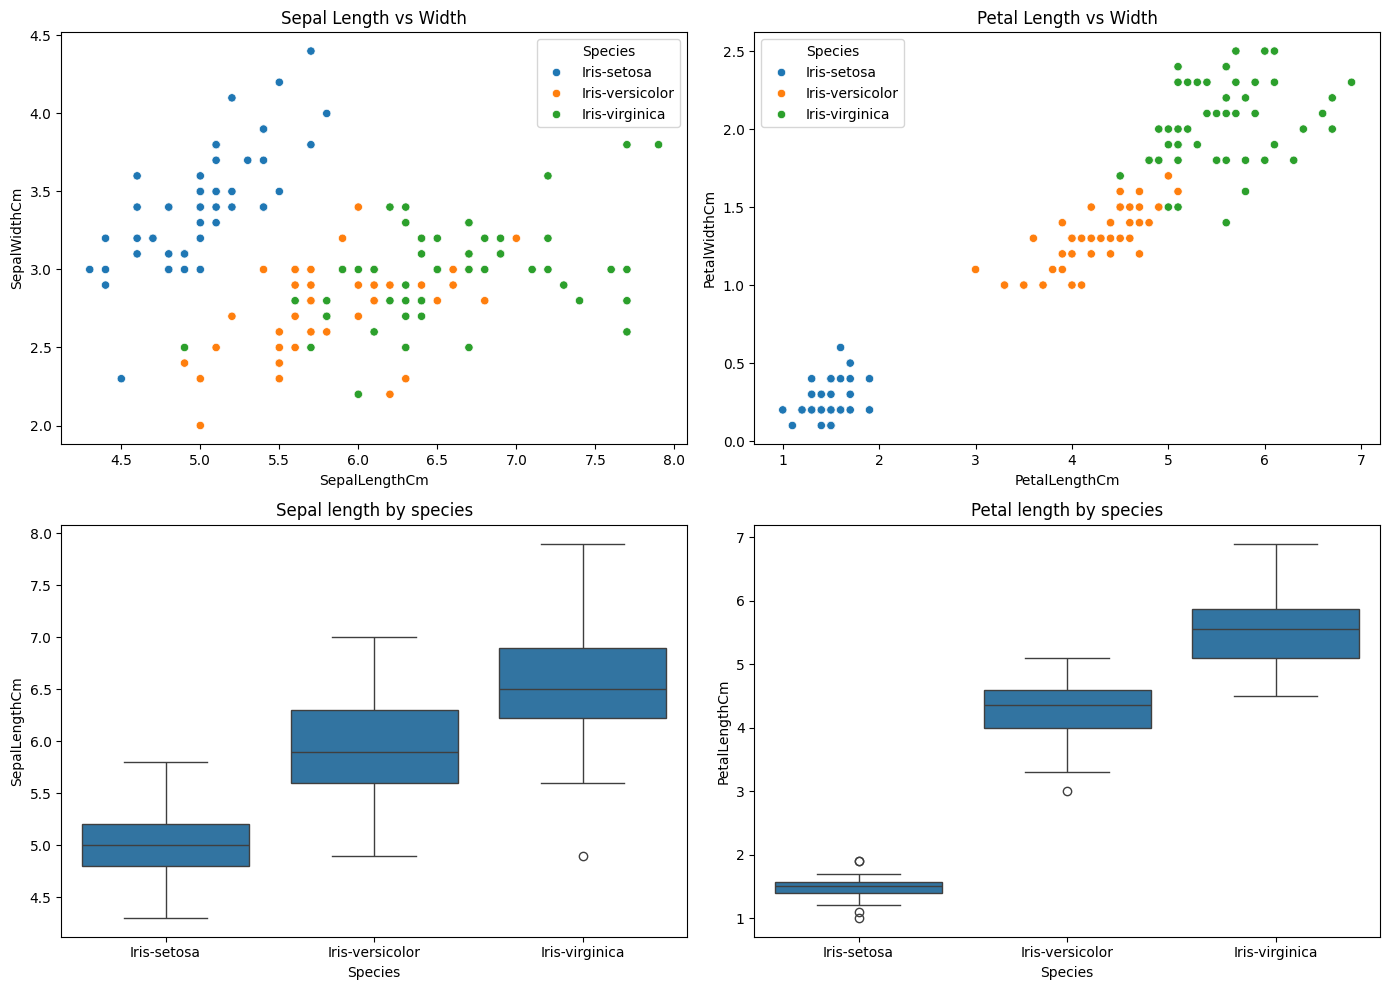

In [4]:
plt.figure(figsize=(14, 10))

# Scatter Plots
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('Sepal Length vs Width')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('Petal Length vs Width')

# Box Plots
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Species', y='SepalLengthCm')
plt.title('Sepal length by species')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Species', y='PetalLengthCm')
plt.title('Petal length by species')

plt.tight_layout()
plt.show()

**Data preparation**

In [5]:
# Split into features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Try multiple K values**

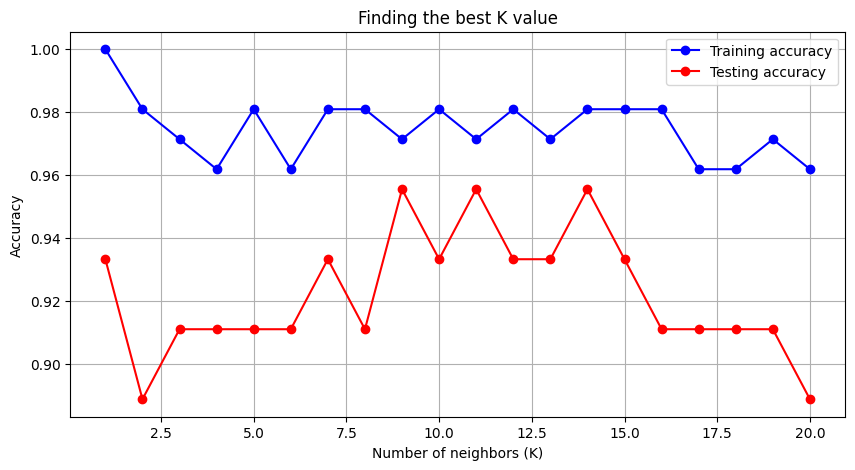


 best K value: 9 (Accuracy: 0.9556)


In [6]:
k_values = range(1, 21)
train_acc, test_acc = [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_acc.append(accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_acc, 'bo-', label='Training accuracy')
plt.plot(k_values, test_acc, 'ro-', label='Testing accuracy')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Finding the best K value')
plt.legend()
plt.grid(True)
plt.show()

# Get best K
best_k = k_values[np.argmax(test_acc)]
print(f"\n best K value: {best_k} (Accuracy: {max(test_acc):.4f})")

**Train final model and evaluate**


 Model evaluation:
Accuracy: 0.9556

 Confusion matrix:


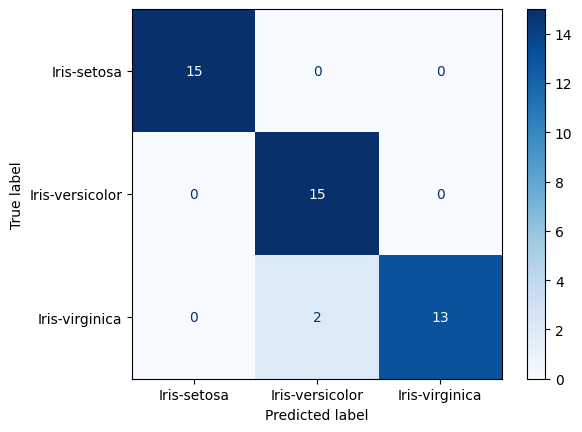


 Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [7]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_pred = final_knn.predict(X_test_scaled)

print("\n Model evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
print("\n Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=final_knn.classes_)
disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

# Classification Report
print("\n Classification report:")
print(classification_report(y_test, y_pred))

**Visualize decision boundaries**

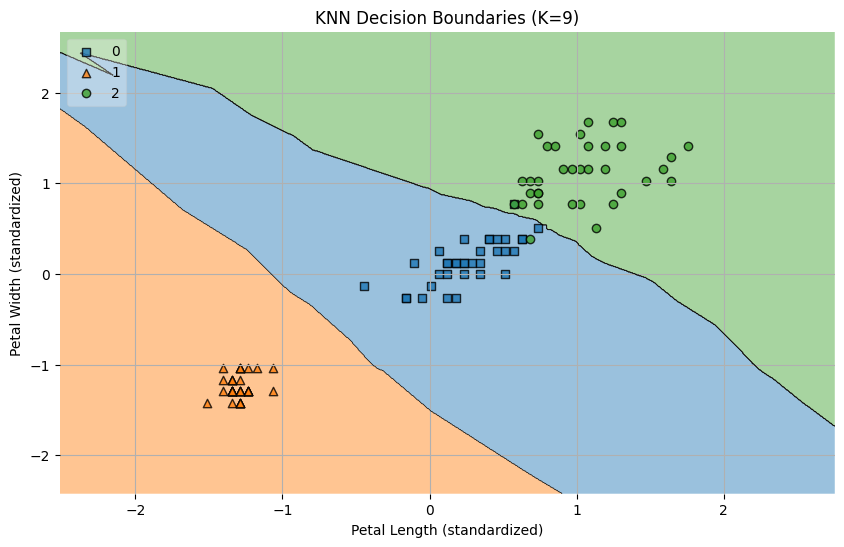

In [10]:
# Prepare 2D feature data for plotting (Petal Length & Petal Width)
X_vis = X_train_scaled[:, [2, 3]]

# Factorize labels (convert string labels to integers)
y_vis_encoded, class_names = pd.factorize(y_train)

# Train KNN on selected features and encoded labels
vis_knn = KNeighborsClassifier(n_neighbors=best_k)
vis_knn.fit(X_vis, y_vis_encoded)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_regions(X_vis, y_vis_encoded, clf=vis_knn, legend=2)

plt.title(f'KNN Decision Boundaries (K={best_k})')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.grid(True)
plt.show()